In [1]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("onlinefraud.csv")  # Update with your dataset path
print(df.head())


       type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2  TRANSFER    181.00  C1305486145          181.0            0.00   
3  CASH_OUT    181.00   C840083671          181.0            0.00   
4   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  
0  M1979787155             0.0             0.0        0  
1  M2044282225             0.0             0.0        0  
2   C553264065             0.0             0.0        1  
3    C38997010         21182.0             0.0        1  
4  M1230701703             0.0             0.0        0  


In [19]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


def apply_hist_gradient_boosting(df):
    features = ["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]
    X = df[features]
    y = df["isFraud"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    model = HistGradientBoostingClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm_gb = confusion_matrix(y_test, y_pred)
    return model, cm_gb

def apply_logistic_regression(df):
    features = ["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]
    X = df[features]
    y = df["isFraud"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    model = LogisticRegression(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm_logistic = confusion_matrix(y_test, y_pred)
    return model, cm_logistic

def plot_logistic_regression_graph(model):
    # Define a range of input values
    x = np.linspace(-10, 10, 1000)
    
    # Calculate corresponding probabilities using the logistic function
    logits = model.coef_[0][0] * x + model.intercept_[0]
    probabilities = 1 / (1 + np.exp(-logits))
    
    # Plot the sigmoid function
    plt.figure(figsize=(8, 6))
    plt.plot(x, probabilities, label='Logistic Regression Sigmoid Function', color='blue')
    plt.xlabel('Input (x)')
    plt.ylabel('Probability')
    plt.title('Logistic Regression Sigmoid Function')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


# Train HistGradientBoosting model
model_gb, cm_gb = apply_hist_gradient_boosting(df)
print("HistGradientBoosting model trained successfully!")
print(cm_gb)

# Train Logistic Regression model
model_lr, cm_logistic = apply_logistic_regression(df)
print("Logistic Regression model trained successfully!")
print(cm_logistic)



HistGradientBoosting model trained successfully!
[[255232     54]
 [   117     17]]
Logistic Regression model trained successfully!
[[255233     53]
 [    30    104]]


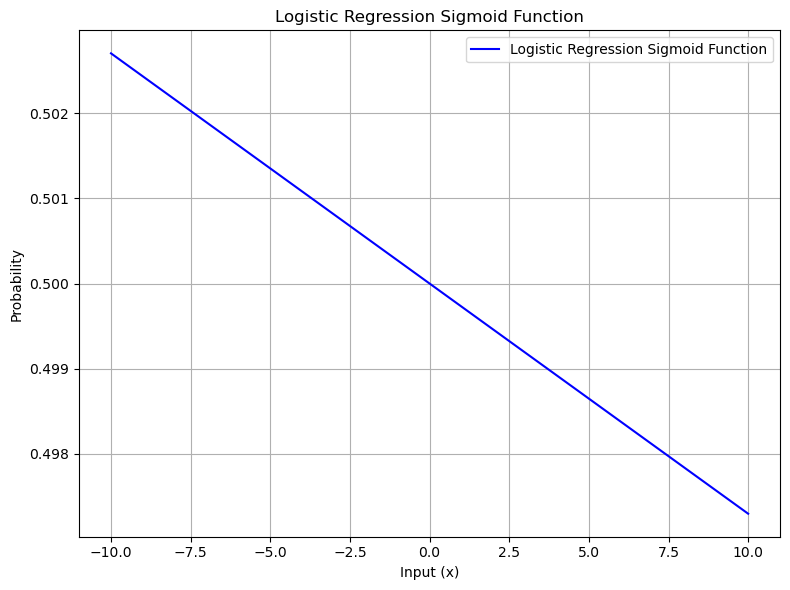

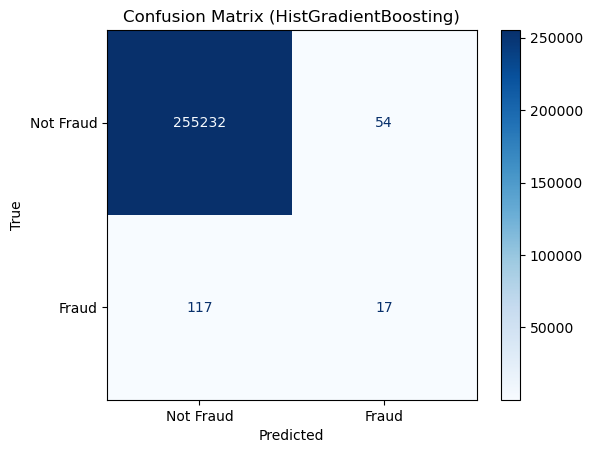

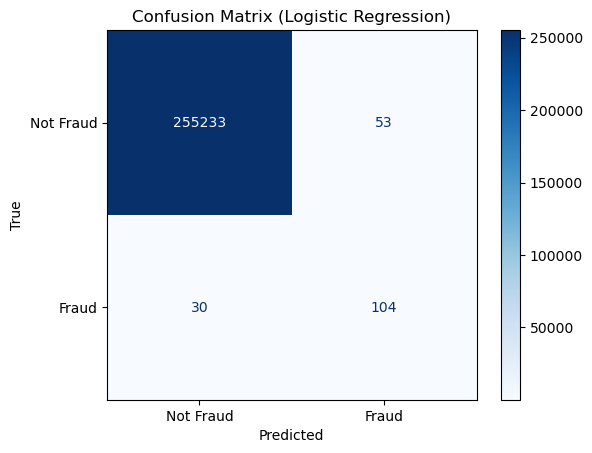

In [16]:

def display_confusion_matrix(cm, title):
    fig, ax = plt.subplots()
    cm_display = ConfusionMatrixDisplay(cm, display_labels=['Not Fraud', 'Fraud']).plot(ax=ax, cmap=plt.cm.Blues)
    ax.set_title(title)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    plt.show()



# Assuming `model_lr` is the trained logistic regression model from `apply_logistic_regression`
plot_logistic_regression_graph(model_lr)

# Display confusion matrices
display_confusion_matrix(cm_gb, 'Confusion Matrix (HistGradientBoosting)')
display_confusion_matrix(cm_logistic, 'Confusion Matrix (Logistic Regression)')
